On this project, we will analyse heart disease factors using data from the CDC. The data was modified such that this final version contains only 18 columns. We will use ML to try to predict the likelihood of heart disease. 


"Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents."

### Columns descriptions
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke: (Ever told) (you had) a stroke?
= PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: Are you male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: (Ever told) (you had) diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is...
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: (Ever told) (you had) asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: (Ever told) (you had) skin cancer?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#chaging dtypes to consume less memory
df = pd.read_csv('heart.csv', dtype={'HeartDisease': 'category', 'Smoking': 'category', 'AlcoholDrinking': 'category',
                                      'Stroke': 'category', 'DiffWalking': 'category', 'Sex': 'category',
                                      'AgeCategory': 'category', 'Race': 'category', 'Diabetic': 'category',
                                      'PhysicalActivity': 'category', 'GenHealth': 'category', 'Asthma': 'category',
                                      'KidneyDisease': 'category',  'SkinCancer': 'category', 
                                      "BMI": "float32", 'PhysicalHealth': 'int8', 
                                      'MentalHealth': 'int8', 'SleepTime': 'int8',
                                      })
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.600000,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.340000,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.580000,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.209999,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.709999,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
df.memory_usage(index=False, deep=True)

HeartDisease         319914
BMI                 1279180
Smoking              320022
AlcoholDrinking      319914
Stroke               319914
PhysicalHealth       319795
MentalHealth         319795
DiffWalking          319914
Sex                  319919
AgeCategory          321163
Race                 320367
Diabetic             320245
PhysicalActivity     320022
GenHealth            320282
SleepTime            319795
Asthma               320022
KidneyDisease        319914
SkinCancer           320022
dtype: int64

In [8]:
df.shape

(319795, 18)

In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

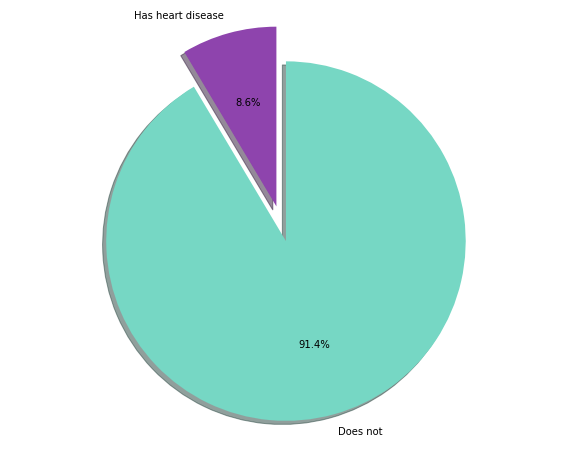

In [10]:
# Pie chart of the HeartDisease column
labels = 'Has heart disease', 'Does not'
colors = ['#8E44AD', '#76D7C4']
sizes = [df.HeartDisease[df['HeartDisease']=='Yes'].count(), df.HeartDisease[df['HeartDisease']=='No'].count()]
explode = (0, 0.2)  # only "explode" 'exited'
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Only a tiny amout of people in the dataset has heart disease. Therefore, this is a imbalancead dataset and we must take care regarding the metrics we choose to analyse model performance. Let's also search for columns we could drop by analyzing the data.

Being that most columns are categorical, let's take a look on what are the categories and how many people fit in each of them.

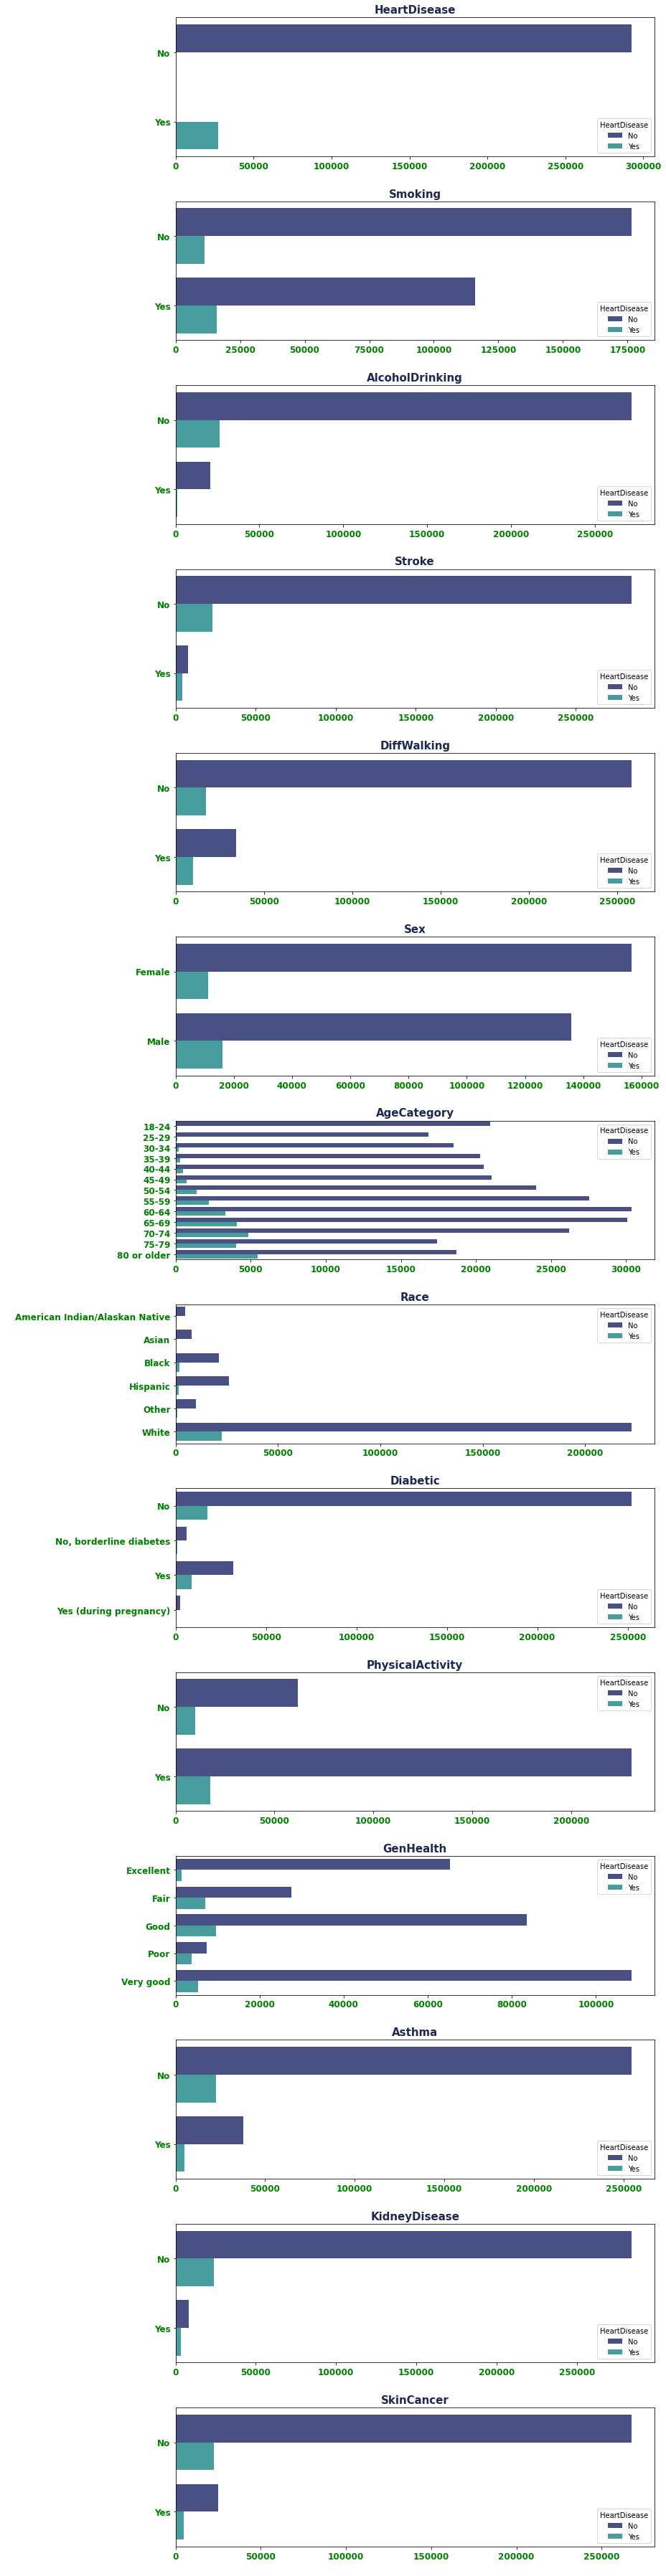

In [11]:
categ_cols = [cname for cname in df.columns if df[cname].dtype.name in ["object", "category"]]

plt.figure(figsize = (13,50))
for i, col in enumerate(categ_cols):
    plt.subplot(14,1,(i+1))
    sns.countplot(y = col,  data = df, hue = 'HeartDisease', palette="mako")
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = '#1E2952')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.tight_layout();

And now, the numerical columns.

In [13]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.328289,3.37171,3.898366,7.097075
std,6.355871,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030001,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.849998,30.00000,30.000000,24.000000


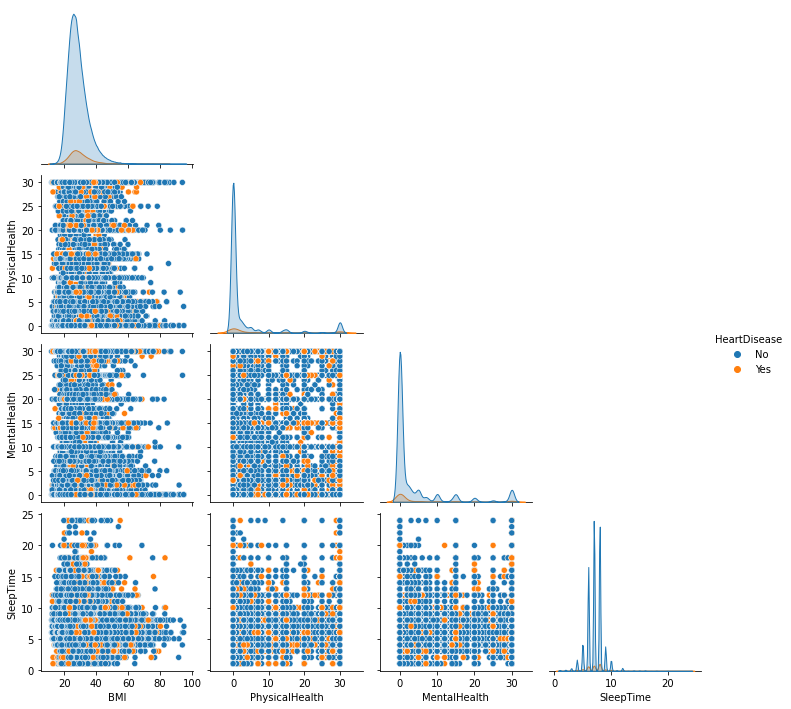

In [12]:
df_num = df.loc[:, ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease']]
g = sns.pairplot(df_num, hue= 'HeartDisease', corner=True)
plt.show()

In [10]:
#p_BMI_obese = (df.loc[(df['BMI'] >=30), 'HeartDisease'].value_counts())/df['HeartDisease'].value_counts()
#p_BMI_over = (df.loc[(df['BMI'] >=25) & (df['BMI'] < 30), 'HeartDisease'].value_counts())/df['HeartDisease'].value_counts()
#p_BMI_healthy = (df.loc[(df['BMI'] >=18.5) & (df['BMI'] < 25), 'HeartDisease'].value_counts())/df['HeartDisease'].value_counts()
#p_BMI_under = (df.loc[(df['BMI'] < 18.5), 'HeartDisease'].value_counts())/df['HeartDisease'].value_counts()
#p_BMI_obese, p_BMI_over, p_BMI_healthy, p_BMI_under

One thing to analyse are the BMI values, to see what is the range of this measurement. According to the CDC, for adults, the BMI is such that:
- Below 18.5 ->	Underweight
- 18.5 – 24.9 -> Healthy Weight
- 25.0 – 29.9 -> Overweight
- 30.0 and Above ->	Obesity

Given that the first quartile is around 24 and the third quartile is 31.42, approximately 75% of people in this dataset are overweight or morbid obese. Given that this dataset comes from the CDC, that claims to conduct annual telephone surveys to gather data on the health status of U.S. residents, if they conduct unbiased survey, then the data allow us to conclude that the U.S. residents are mostly overweight and morbid obese, and policies need to be conducted to address this issue.

<AxesSubplot:xlabel='HeartDisease', ylabel='SleepTime'>

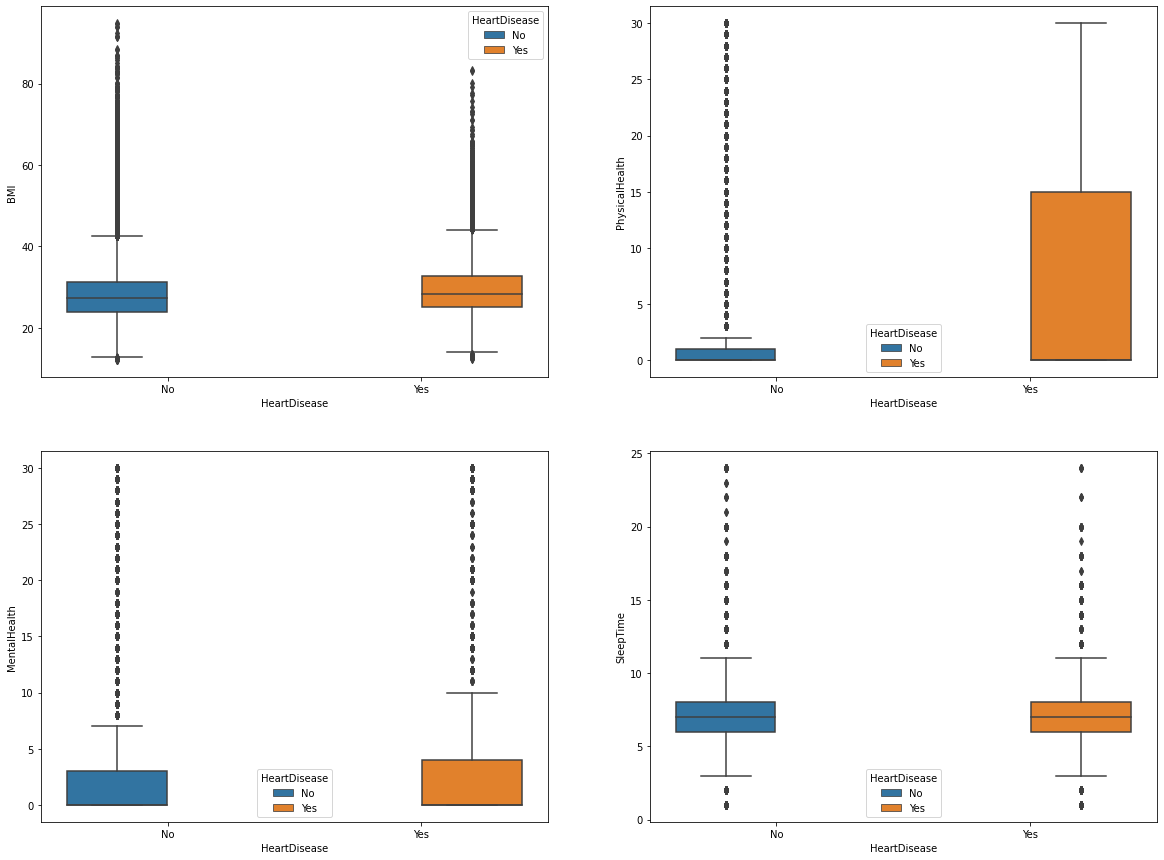

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(y='BMI', x = 'HeartDisease', hue = 'HeartDisease', data = df, ax=axarr[0][0])
sns.boxplot(y='PhysicalHealth', x = 'HeartDisease', hue = 'HeartDisease', data = df , ax=axarr[0][1])
sns.boxplot(y='MentalHealth', x = 'HeartDisease', hue = 'HeartDisease', data = df, ax=axarr[1][0])
sns.boxplot(y='SleepTime', x = 'HeartDisease', hue = 'HeartDisease', data = df, ax=axarr[1][1])


General observations about the data:
- There are many outliers in the numerical columns, therefore we will use RobustScaler to standardize the numerical data.
- Those that smoke, had a stroke, have difficulty walking, do not do phyisical activities and males seem to have more heart disease.
- Age has also a strong influence on having heart disease.
- Races other than white are very underepresented. Besides, when we consider race, we must also consider social factors that could very much improve the likelihood of having heart disease, such as access to healthier diet and time availability to practice physical activities. Due to these reasons, we will not consider the Race column.
- To fix the imbalance, we will apply SMOTENC. And to do this, we need to binarize the column HeartDisease.

## Data preprocessing

In [31]:
df.drop(['Race'], axis=1, inplace=True)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTENC

# Separate target from predictors
y_before = df.HeartDisease
X = df.drop(['HeartDisease'], axis=1)

#transform y_before into 0s and 1s
y_after = pd.get_dummies(y_before)
y_after = y_after.drop(["No"], axis=1) #drop column No, so 0->No and 1->Yes
y = y_after.rename(columns={"Yes": "HeartDisease"}) #renaming Yes column to original column name

# Divide data into training and validation subsets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42, stratify=y)

# Selecting categorical columns
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].dtype.name in ["category"]] 

# Selecting numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int8', 'float32']]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy() #test data

categorical_cols, numerical_cols

(['Smoking',
  'AlcoholDrinking',
  'Stroke',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'],
 ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])

In [18]:
X_train.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
143355,Yes,No,No,Yes,Female,45-49,No,No,Fair,Yes,No,No,23.620001,30,30,5
290535,No,No,No,No,Male,25-29,No,Yes,Very good,No,No,No,22.430000,1,0,8
31528,Yes,No,No,No,Female,30-34,No,No,Fair,No,No,No,33.279999,20,30,7
234534,Yes,No,No,No,Female,65-69,No,Yes,Very good,No,No,No,24.959999,0,0,8
264813,Yes,No,No,No,Female,55-59,No,Yes,Very good,No,No,No,27.250000,0,0,5


In [19]:
y_train.head()

,HeartDisease
143355,0
290535,0
31528,0
234534,0
264813,0


In [20]:
y_test.head(), y_test.value_counts()

(        HeartDisease
 229267             0
 133926             0
 307338             0
 284517             0
 58968              0,
 HeartDisease
 0               58484
 1                5475
 dtype: int64)

In [33]:
#SMOTENC oversampling to fix the imbalance
smote_nc = SMOTENC(categorical_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], sampling_strategy=0.5,
                   random_state=42, n_jobs=-1)
X_train, y_train= smote_nc.fit_resample(X_train, y_train)

In [34]:
y_train.value_counts()

HeartDisease
0               233938
1               116969
dtype: int64

In [36]:
# Preprocessing data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])


## ML Models

Models we will use: Logistic Regression, SVC, Random Forest, XGB, LGBM and CatBoost. Not all of them will be hyperparameter tuned due to computational time. Metrics used will be AUC ROC, recall, precision and F1, since the dataset is umbalanced. We will specially search for a greater recall value for the 'Yes'.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Logistic Regression

In [37]:
lr_pip = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',LogisticRegression())
                             ])
lr_params = {'model__C': [1000, 100, 10, 1.0, 0.1, 0.01], #some hyperparameter tuning
             'model__solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr_cv = GridSearchCV(lr_pip, param_grid=lr_params, n_jobs = -1, cv=5)
lr_cv.fit(X_train, y_train.values.ravel())
lr_cv.best_params_

{'model__C': 1000, 'model__solver': 'newton-cg'}

In [52]:
#pipeline with best hyperparameters
lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model',LogisticRegression(solver= "newton-cg", C= 1000, random_state=42)),
                             ])
lr_tuned = lr.fit(X_train, y_train.values.ravel())
lr_preds = lr.predict(X_test)

lr_report = classification_report(y_test.values.ravel(), lr_preds)
lr_auc = cross_val_score(estimator=lr, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1, scoring='roc_auc')
print("Mean AUC: {:.2f}%" .format(lr_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(lr_auc.std()*100))
print(lr_report)

Mean AUC: 85.62%
Standard deviation: 1.28%
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     58484
           1       0.28      0.58      0.38      5475

    accuracy                           0.84     63959
   macro avg       0.62      0.72      0.64     63959
weighted avg       0.90      0.84      0.86     63959



In [53]:
confusion_matrix(y_test, lr_preds)


array([[50418,  8066],
       [ 2323,  3152]], dtype=int64)

### Random Forest

In [42]:
rf_pip = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',RandomForestClassifier(random_state=42))
                             ])
rf_params = {'model__max_depth': [3, 6, 9], #some hyperparameter tuning
             'model__min_samples_leaf':[0.05 ,0.1, 0.2],  
}

rf_cv = GridSearchCV(rf_pip, param_grid=rf_params, n_jobs = -1, cv=5)
rf_cv.fit(X_train, y_train.values.ravel())
rf_cv.best_params_

{'model__max_depth': 6, 'model__min_samples_leaf': 0.05}

In [43]:
rf= Pipeline(steps=[('preprocessor', preprocessor),
                     ('model',RandomForestClassifier(max_depth=6, min_samples_leaf=0.05)),
                             ])
rf_tuned = rf.fit(X_train, y_train.values.ravel())
rf_preds = rf.predict(X_test)

rf_report = classification_report(y_test.values.ravel(), rf_preds)
rf_auc = cross_val_score(estimator=rf, X=X_train, y=y_train.values.ravel(), cv=10)
print("Mean AUC: {:.2f}%" .format(rf_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(rf_auc.std()*100))
print(rf_report)

Mean AUC: 72.25%
Standard deviation: 0.42%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58484
           1       0.32      0.25      0.28      5475

    accuracy                           0.89     63959
   macro avg       0.62      0.60      0.61     63959
weighted avg       0.88      0.89      0.88     63959



In [45]:
confusion_matrix(y_test, rf_preds)

array([[55582,  2902],
       [ 4123,  1352]], dtype=int64)

### XGBoost

In [44]:
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',XGBClassifier())
                             ])
xgb.fit(X_train, y_train.values.ravel())
xgb_preds = xgb.predict(X_test)

xgb_report = classification_report(y_test.values.ravel(), xgb_preds)
xgb_auc = cross_val_score(estimator=xgb, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1)
print("Mean AUC: {:.2f}%" .format(xgb_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(xgb_auc.std()*100))
print(xgb_report)

Mean AUC: 83.58%
Standard deviation: 3.98%
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     58484
           1       0.28      0.47      0.35      5475

    accuracy                           0.85     63959
   macro avg       0.62      0.68      0.64     63959
weighted avg       0.89      0.85      0.87     63959



In [46]:
confusion_matrix(y_test, xgb_preds)

array([[51986,  6498],
       [ 2894,  2581]], dtype=int64)

### LGBM

In [47]:
lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',LGBMClassifier())
                             ])
lgbm.fit(X_train, y_train.values.ravel())
lgbm_preds = lgbm.predict(X_test)

lgbm_report = classification_report(y_test.values.ravel(), lgbm_preds)
lgbm_auc = cross_val_score(estimator=lgbm, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1)
print("Mean AUC: {:.2f}%" .format(lgbm_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(lgbm_auc.std()*100))
print(lgbm_report)

Mean AUC: 80.18%
Standard deviation: 1.78%
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     58484
           1       0.27      0.56      0.36      5475

    accuracy                           0.83     63959
   macro avg       0.61      0.71      0.63     63959
weighted avg       0.90      0.83      0.86     63959



In [48]:
confusion_matrix(y_test, lgbm_preds)

array([[50152,  8332],
       [ 2395,  3080]], dtype=int64)

### CatBoost

In [49]:
cat = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',CatBoostClassifier())
                             ])
cat.fit(X_train, y_train.values.ravel())
cat_preds = cat.predict(X_test)

cat_report = classification_report(y_test.values.ravel(), cat_preds)
cat_auc = cross_val_score(estimator=cat, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1)
print("Mean AUC: {:.2f}%" .format(cat_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(cat_auc.std()*100))
print(cat_report)

Learning rate set to 0.125815
0:	learn: 0.6462948	total: 201ms	remaining: 3m 20s
1:	learn: 0.6131321	total: 278ms	remaining: 2m 18s
2:	learn: 0.5834148	total: 341ms	remaining: 1m 53s
3:	learn: 0.5644859	total: 391ms	remaining: 1m 37s
4:	learn: 0.5468109	total: 438ms	remaining: 1m 27s
5:	learn: 0.5330169	total: 503ms	remaining: 1m 23s
6:	learn: 0.5215811	total: 579ms	remaining: 1m 22s
7:	learn: 0.5116729	total: 628ms	remaining: 1m 17s
8:	learn: 0.5019090	total: 675ms	remaining: 1m 14s
9:	learn: 0.4921378	total: 741ms	remaining: 1m 13s
10:	learn: 0.4873411	total: 816ms	remaining: 1m 13s
11:	learn: 0.4807147	total: 909ms	remaining: 1m 14s
12:	learn: 0.4769201	total: 987ms	remaining: 1m 14s
13:	learn: 0.4729601	total: 1.07s	remaining: 1m 15s
14:	learn: 0.4673506	total: 1.15s	remaining: 1m 15s
15:	learn: 0.4642290	total: 1.23s	remaining: 1m 15s
16:	learn: 0.4612324	total: 1.32s	remaining: 1m 16s
17:	learn: 0.4589085	total: 1.39s	remaining: 1m 15s
18:	learn: 0.4572281	total: 1.46s	remaining:

In [50]:
confusion_matrix(y_test, cat_preds)

array([[51246,  7238],
       [ 2768,  2707]], dtype=int64)

Best model performance: Logistic Regression, with greater F1 score and mean AUC.

### ML with PCA

In this section, we will perform PCA in tha dataset to see if there is any advantage in using this method with respect to increasing the f1 score. 

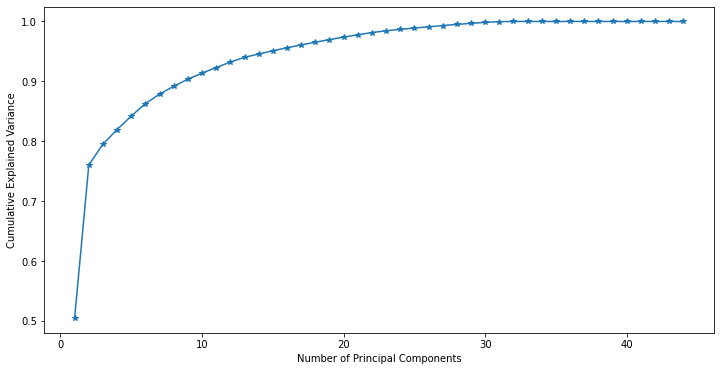

In [78]:
from sklearn.decomposition import PCA

X_train_pca = preprocessor.fit_transform(X_train) #fitting only X_train to perform pca 
#just to remember that X_train has 44 columns after one hot encoding

pca=PCA()
X_pca = pca.fit_transform(X_train_pca)
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,X_pca.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker="*")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.show();

In [85]:
for n in [10,15,20,30]:
    pca_n = PCA(n_components=n)
    X_pcan = pca_n.fit_transform(X_train_pca)
    exp_var = round(np.sum(pca_n.explained_variance_ratio_)*100,2)
    print('Number of Principal Components: ',n, 'Total Explained Variance: ',exp_var,'%')

Number of Principal Components:  10 Total Explained Variance:  91.37 %
Number of Principal Components:  15 Total Explained Variance:  95.1 %
Number of Principal Components:  20 Total Explained Variance:  97.38 %
Number of Principal Components:  30 Total Explained Variance:  99.85 %


According to the previous graph, with 10 principal components, we have 91.37% of the explained variance. Since X_train has 44 columns, diminishing the dimension to 10 seems to be advantageous. Let's check if this dimension reduction will result in better Logistic Regression performance.

In [84]:
lr_pip_pca = Pipeline(steps=[('preprocessor', preprocessor),
                             ('pca', PCA(n_components=10)),
                         ('model',LogisticRegression())
                             ])
lr_pca_params = {'model__C': [1000, 100, 10, 1.0, 0.1, 0.01], 
             'model__solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr_cv_pca = GridSearchCV(lr_pip_pca, param_grid=lr_pca_params, n_jobs = -1, cv=5)
lr_cv_pca.fit(X_train, y_train.values.ravel())
lr_cv_pca.best_params_

{'model__C': 10, 'model__solver': 'liblinear'}

In [86]:
lr_pca = Pipeline(steps=[('preprocessor', preprocessor),
                         ('pca', PCA(n_components=10)),
                     ('model',LogisticRegression(solver= "liblinear", C= 10, random_state=42)),
                             ])
lr_pca.fit(X_train, y_train.values.ravel())
lr_pca_preds = lr_pca.predict(X_test)

lr_pca_report = classification_report(y_test.values.ravel(), lr_pca_preds)
lr_pca_auc = cross_val_score(estimator=lr_pca, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1, scoring='roc_auc')
print("Mean AUC: {:.2f}%" .format(lr_pca_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(lr_pca_auc.std()*100))
print(lr_pca_report)

Mean AUC: 77.89%
Standard deviation: 0.28%
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     58484
           1       0.27      0.43      0.33      5475

    accuracy                           0.85     63959
   macro avg       0.60      0.66      0.62     63959
weighted avg       0.89      0.85      0.86     63959



In [87]:
confusion_matrix(y_test, lr_pca_preds)

array([[51942,  6542],
       [ 3101,  2374]], dtype=int64)

With 10 principal components the results were no better. Now, let's see the performance of the LR model if we choose 30 principal components that explain almost 100% of the variance and still is 32% smaller than the complete X_train.

In [89]:
lr_pip_pca = Pipeline(steps=[('preprocessor', preprocessor),
                             ('pca', PCA(n_components=30)),
                         ('model',LogisticRegression())
                             ])
lr_pca_params = {'model__C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001],
             'model__solver': ['newton-cg', 'liblinear']}

lr_cv_pca = GridSearchCV(lr_pip_pca, param_grid=lr_pca_params, n_jobs = -1, cv=5)
lr_cv_pca.fit(X_train, y_train.values.ravel())
lr_cv_pca.best_params_

{'model__C': 0.1, 'model__solver': 'liblinear'}

In [90]:
lr_pca = Pipeline(steps=[('preprocessor', preprocessor),
                         ('pca', PCA(n_components=30)),
                     ('model',LogisticRegression(solver= "liblinear", C= 0.1, random_state=42)),
                             ])
lr_pca.fit(X_train, y_train.values.ravel())
lr_pca_preds = lr_pca.predict(X_test)

lr_pca_report = classification_report(y_test.values.ravel(), lr_pca_preds)
lr_pca_auc = cross_val_score(estimator=lr_pca, X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1, scoring='roc_auc')
print("Mean AUC: {:.2f}%" .format(lr_pca_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(lr_pca_auc.std()*100))
print(lr_pca_report)

Mean AUC: 85.51%
Standard deviation: 1.12%
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     58484
           1       0.28      0.58      0.38      5475

    accuracy                           0.84     63959
   macro avg       0.62      0.72      0.64     63959
weighted avg       0.90      0.84      0.86     63959



In [91]:
confusion_matrix(y_test, lr_pca_preds)

array([[50389,  8095],
       [ 2315,  3160]], dtype=int64)

As we can see, choosing 30 principal components gives almost the same performance without PCA. Since we reduced the dimension, the time to run the model in my PC with PCA was 1min faster. Therefore, we can conclude the PCA doest not improve this dataset except in terms of memory usage.

## Conclusions

- The best model was Logistic Regression, with F1 scores of 0.38 for Yes and 0.91 for No, mean ROC AUC of 85.62% and a 58% correct prediction of heart disease. 
- SMOTENC allows us to better balance the dataset and therefore helps with increasing F1 scores.
- PCA didn't improve the scores of the best model. A high number of principal components is needed in order to obtain the same scores obtained without PCA. But it could, in fact, run the model faster.

It is important to pay attention so that habit features such as Smoking, AlcoholDrinking, PhysicalHealth, MentalHealth, PhysicalActivity, GenHealth and SleepTime do not become misleading. People diagnosed with heart disease are advised to change some habits in order to better treat it, so they may quit smoking and alcohol drinking and start doing more physical activities, i.e., improve their health. Therefore, the model could wrongly associate these columns with the target column. 